# Exercise Sheet 7

Willy Oesterheld (508791)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd


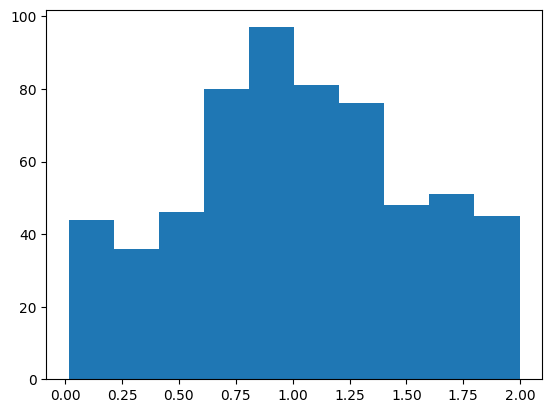

In [3]:
data = pd.read_csv('../../notebooks/data/ex9_data.csv.gz')
values = data.x
plt.hist(values)
plt.show()

In [4]:
signal_factor = 4/(sp.special.erf(2*np.sqrt(2))*np.sqrt(2*np.pi))

def pdf_signal(x):
    return signal_factor * np.exp(-0.5*(4*(x-1))**2)

def pdf(x, nu_s, nu_b):
    return nu_s/(nu_s+nu_b)*pdf_signal(x) + 0.5*nu_b/(nu_s+nu_b)

def ext_log_likelihood(x, nu_s, nu_b):
    nu = nu_s + nu_b
    llh = -nu + np.sum(np.log(nu*pdf(x, nu_s, nu_b)))
    return llh

In [5]:
def neg_ell(nu_s, nu_b, x):
    return -ext_log_likelihood(x, nu_s, nu_b)

nu_b = 420.7
nu_s_optimization = sp.optimize.minimize(neg_ell, x0=1, args=(nu_b, values))
print(nu_s_optimization)
nu_s_estimate = nu_s_optimization.x[0]
print(f"Estimated value of nu_s: {nu_s_estimate}")
ll_max = ext_log_likelihood(values, nu_s_estimate, nu_b)
print(f"Estimated maximum value of the extended log-likelyhood: {ll_max}")

      fun: -2874.7137057689783
 hess_inv: array([[509.02425258]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 8
     njev: 12
   status: 0
  success: True
        x: array([179.30486843])
Estimated value of nu_s: 179.3048684342914
Estimated maximum value of the extended log-likelyhood: 2874.7137057689783


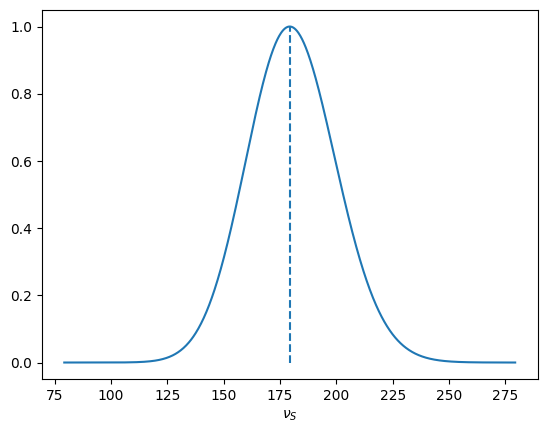

In [6]:
n = 1000
nu_s_range = np.linspace(nu_s_estimate-100, nu_s_estimate+100, n)
ll = np.array([ext_log_likelihood(values, x, nu_b) for x in nu_s_range])
plt.plot(nu_s_range, np.exp(ll-ll_max))
plt.xlabel("$\\nu_S$")
plt.vlines(nu_s_estimate, 0, 1, linestyles="dashed")
plt.show()

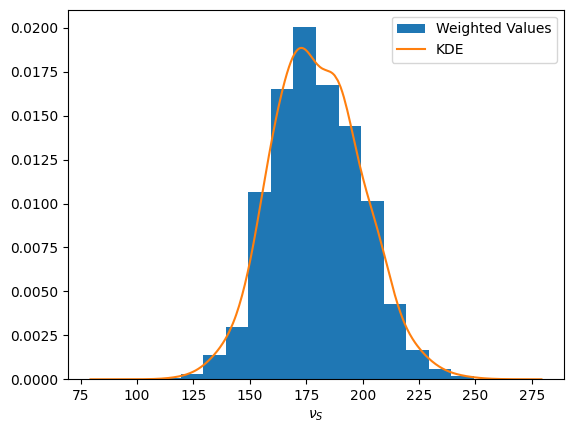

In [13]:
nu_s_random = np.sort(np.random.uniform(low=nu_s_estimate-100, high=nu_s_estimate+100, size=1000))
ll = np.array([ext_log_likelihood(values, x, nu_b) for x in nu_s_random])
weights = np.exp(ll-ll_max)

kde = sp.stats.gaussian_kde(nu_s_random, weights=weights)
kde_values = kde.evaluate(nu_s_random)


plt.hist(nu_s_random, weights=weights, density=True, bins=20, label="Weighted Values")
plt.plot(nu_s_random, kde_values, label="KDE")
plt.xlabel("$\\nu_S$")
plt.legend()
plt.show()
